In [1]:
%%time
# Imports
from utils import *

CPU times: total: 3.25 s
Wall time: 6.47 s


File-Reading

In [2]:
%%time

# Get start time
start = time.perf_counter()

# File-Reading
path = os.path.join(os.getcwd() , out_file) # from utils
# user = []
ts = []
# ca = []
tweets = []
# mentions = []
# coord = []
country = []

with open(path , 'r' , encoding='utf-8') as in_file:
    csv_reader = csv.reader(in_file , delimiter = "|")
    for line in csv_reader:
        # user.append(line[0])
        ts.append(line[1])
        # ca.append(line[2])
        tweets.append(line[3])
        # mentions.append(line[4])
        # coord.append(line[5])
        country.append(line[6])

ts_convert = [datetime.datetime.fromtimestamp(int(dt)//1000) for dt in ts]

CPU times: total: 45.8 s
Wall time: 52 s


### **QUESTION 1**

Identify 3 days with unusually high activity in 3 different countries of your choosing. For example you could choose one day in the UK, one in France and one in Turkey. Describe and justify how you identify ‘unusual’ days.

In [3]:
twt_df = pd.DataFrame(
    list(zip(tweets , ts_convert , country)),
    columns = ['tweet_id' , 'ts' , 'country']
)

twt_df = twt_df[twt_df['tweet_id']!="None"].drop_duplicates()
len(twt_df)

15033548

In [9]:
# https://www.kaggle.com/datasets/prasertk/country-name-in-different-languages
country_codes = pd.read_csv(
    os.path.join(
        os.getcwd() , 'country name in different languages.csv'
        )
    )

# Let's randomly decide on 3 countries for now.
country_list = ['United Kingdom' , 'France' , 'Netherlands']

# Let's get these countries and the different names they're called by!
restricted_country_names = country_codes[country_codes['en'].isin(country_list)].drop('country_code' , axis = 1)
pivoted_country_names = pd.melt(
    restricted_country_names, id_vars=['en'], var_name='language', value_name='name'
    )[['en' , 'name']].drop_duplicates()

# English names are being left out - add them back in
english_names = []
for c in country_list:
    english_names.append([c , c])

english_name_df = pd.DataFrame(english_names , columns = ['en' , 'name'])
pivoted_country_names = pd.concat([pivoted_country_names , english_name_df] , axis = 0).drop_duplicates()
pivoted_country_names.head()

,en,name
0,France,فرنسا
1,United Kingdom,المملكة المتحدة
2,Netherlands,هولندا
3,France,Frankreich
4,United Kingdom,Großbritannien


In [5]:
restricted_country_df = twt_df.merge(pivoted_country_names , left_on = 'country' , right_on = 'name' , how = 'inner')
restricted_country_df = restricted_country_df[['tweet_id' , 'ts' , 'en']]#.dropna()

# Create a date column
restricted_country_df['ts_day'] = pd.to_datetime(restricted_country_df['ts']).dt.date
# restricted_country_df.count()

# Group at day level
res_country_grp = restricted_country_df.groupby(['ts_day','en']).agg(num_twt = ('tweet_id' , 'nunique')).reset_index().set_index('ts_day')

In [6]:
# # Plot - Add axis labels, title
# fig , axes = plt.subplots(len(country_list) , 1 , figsize = (20,10))
# for _ , (ax , country) in enumerate(zip(axes , country_list)):
#     df = res_country_grp[res_country_grp['en']==country][['num_twt']]
#     ax.plot(df , label = country)
#     ax.legend(loc = 'upper center')

In [7]:
ts_1 = res_country_grp[res_country_grp['en']==country_list[0]].num_twt.rename(country_list[0])
ts_2 = res_country_grp[res_country_grp['en']==country_list[1]].num_twt.rename(country_list[1])
ts_3 = res_country_grp[res_country_grp['en']==country_list[2]].num_twt.rename(country_list[2])

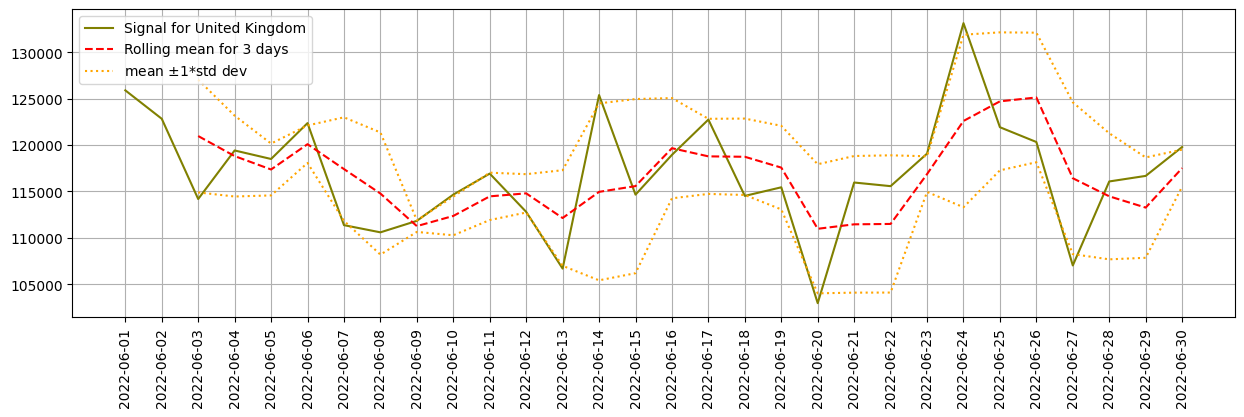

In [8]:
# Anomaly Detection using Bollinger Bands-adjacent method
fig , ax = plt.subplots(figsize = (15,4))

rate = 3
tolerance = 1
ax.plot(ts_1 , c = 'olive' , label = f'Signal for {ts_1.name}');
ax.plot(ts_1.rolling(rate).mean() , lw = 1.5 , ls = "--" , c = 'red' , label = f'Rolling mean for {rate} days');
ax.plot(ts_1.rolling(rate).mean() + tolerance*ts_1.rolling(3).std() , lw = 1.5 , ls = ":" , c = 'orange' , label = f'mean $\pm${tolerance}*std dev');
ax.plot(ts_1.rolling(rate).mean() - tolerance*ts_1.rolling(3).std() , lw = 1.5 , ls = ":" , c = 'orange');
ax.legend(loc='upper left');
ax.grid();
ax.set_xticks(ts_1.index);
ax.set_xticklabels(labels = ts_1.index, rotation = 90);

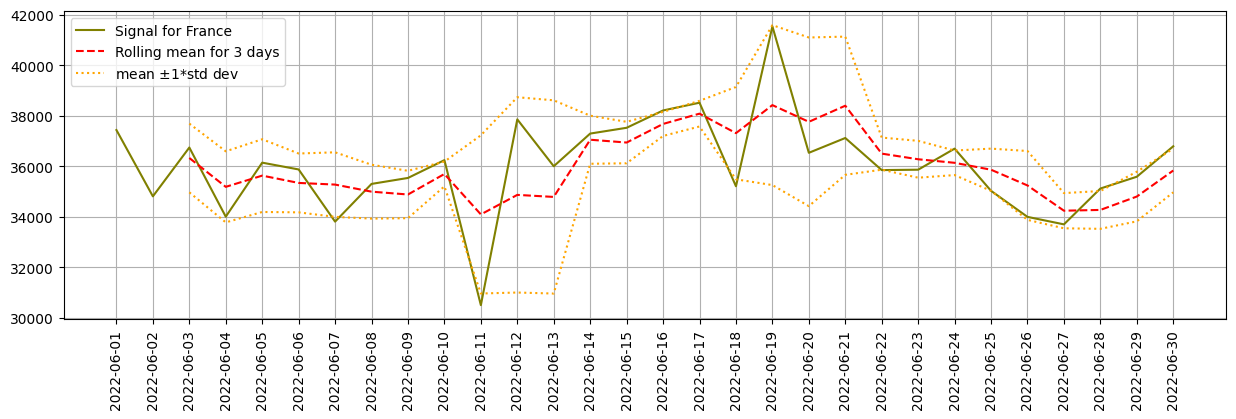

In [9]:
# Anomaly Detection using Bollinger Bands-adjacent method
fig , ax = plt.subplots(figsize = (15,4))

rate = 3
tolerance = 1
ax.plot(ts_2 , c = 'olive' , label = f'Signal for {ts_2.name}');
ax.plot(ts_2.rolling(rate).mean() , lw = 1.5 , ls = "--" , c = 'red' , label = f'Rolling mean for {rate} days');
ax.plot(ts_2.rolling(rate).mean() + tolerance*ts_2.rolling(3).std() , lw = 1.5 , ls = ":" , c = 'orange' , label = f'mean $\pm${tolerance}*std dev');
ax.plot(ts_2.rolling(rate).mean() - tolerance*ts_2.rolling(3).std() , lw = 1.5 , ls = ":" , c = 'orange');
ax.legend(loc='upper left');
ax.grid();
ax.set_xticks(ts_2.index);
ax.set_xticklabels(labels = ts_2.index, rotation = 90);

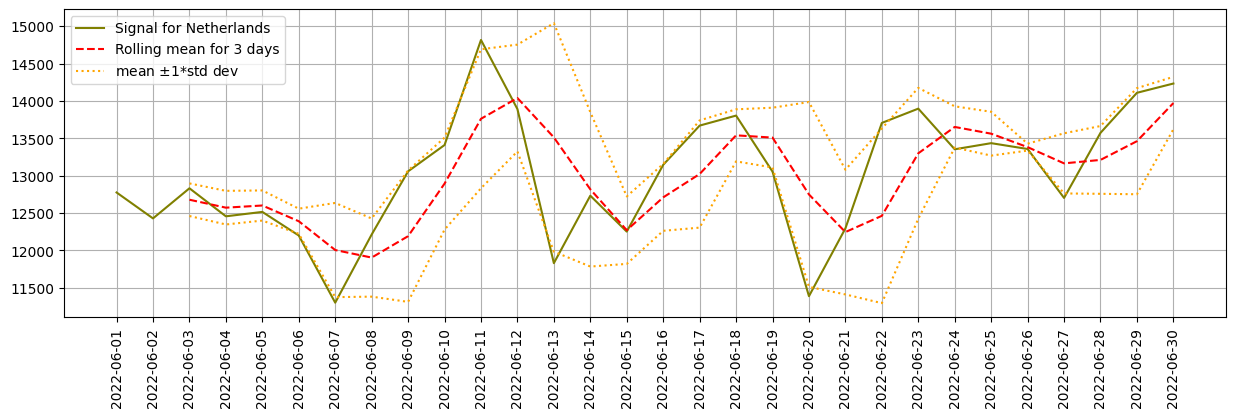

In [10]:
# Anomaly Detection using Bollinger Bands-adjacent method
fig , ax = plt.subplots(figsize = (15,4))

rate = 3
tolerance = 1
ax.plot(ts_3 , c = 'olive' , label = f'Signal for {ts_3.name}');
ax.plot(ts_3.rolling(rate).mean() , lw = 1.5 , ls = "--" , c = 'red' , label = f'Rolling mean for {rate} days');
ax.plot(ts_3.rolling(rate).mean() + tolerance*ts_3.rolling(3).std() , lw = 1.5 , ls = ":" , c = 'orange' , label = f'mean $\pm${tolerance}*std dev');
ax.plot(ts_3.rolling(rate).mean() - tolerance*ts_3.rolling(3).std() , lw = 1.5 , ls = ":" , c = 'orange');
ax.legend(loc='upper left');
ax.grid();
ax.set_xticks(ts_2.index);
ax.set_xticklabels(labels = ts_2.index, rotation = 90);

From the above graph, the following days stand out as days of 'anomalous' activity
- 24th June in United Kingdom
- 19th June in France
- 11th June in Netherlands

### **QUESTION 2**

Characterise each of these three days by <br/>
a. Making a word cloud from the tweet text. [5 marks] <br/>
b. Any other method. [5 marks]

In [11]:
%%time

# File-Reading
path = os.path.join(os.getcwd() , out_file_for_text) # from utils

print(f'the path is -> {path}')

ts = []
tweets = []
country = []
full_text = []

with open(path , 'r' , encoding='utf-8') as in_file:
    for line in in_file:
        line = line.rstrip()
        tweet = line.split('|') # get reqd data in a list format
        # add into individual lists
        ts.append(tweet[0])
        tweets.append(tweet[1])
        country.append(tweet[2])
        full_text.append(tweet[3])
        
ts_convert = [datetime.datetime.fromtimestamp(int(dt)//1000) for dt in ts]

the path is -> c:\Users\soura\Documents\ECMM443\Twitter_Coursework\all_june_tweets_text.txt
CPU times: total: 40 s
Wall time: 44 s


In [12]:
%%time

twt_df = pd.DataFrame(list(zip(tweets , ts_convert , country , full_text)) , columns = ['tweet_id' , 'ts' , 'country' , 'text'])
twt_df = twt_df[twt_df['tweet_id']!="None"].drop_duplicates()
print(f'length of tweet -> {len(twt_df)}')

length of tweet -> 15033548
CPU times: total: 1min 2s
Wall time: 1min 10s


In [13]:
restricted_country_df = twt_df.merge(pivoted_country_names , left_on = 'country' , right_on = 'name' , how = 'inner')
restricted_country_df = restricted_country_df[['ts' , 'tweet_id' , 'en' , 'text']]#.dropna()

# Create a date column
restricted_country_df['ts_day'] = pd.to_datetime(restricted_country_df['ts']).dt.date

# restrict acc to dates and country
uk_df = restricted_country_df[
    (
        (restricted_country_df['en']=="United Kingdom")&(restricted_country_df['ts_day']==pd.to_datetime("2022-06-24").date())
    )
]

fr_df = restricted_country_df[
    (
        (restricted_country_df['en']=="France")&(restricted_country_df['ts_day']==pd.to_datetime("2022-06-19").date())
    )
]

nl_df = restricted_country_df[
    (
        (restricted_country_df['en']=="Netherlands")&(restricted_country_df['ts_day']==pd.to_datetime("2022-06-11").date())
    )
]

### **Create Word Cloud**

In [14]:
from spacy.lang.fr.stop_words import STOP_WORDS as fr_stop
from spacy.lang.en.stop_words import STOP_WORDS as en_stop
from spacy.lang.nl.stop_words import STOP_WORDS as nl_stop

en_lang_stopwords_list = list(en_stop) + ['https','co','t','c','d','l','j','s','good','thank','day','year','week','today','amp','time','great',
'like','people','love','new','think','no','yes','going','need','work','right','know','look','got','m','thanks',"I'm",'morning','hope','want',
've','way',"don't",'best','years','come','don','photo','Happy','thing','night','posted','better','X','Friday','let','lot','live','life',
'looking','Oh','London','world','weekend','lovely']

fr_lang_stopwords_list = list(fr_stop) + ['https','co','t','c','d','l','j','s','Foto']

nl_lang_stopwords_list = list(nl_stop) + ['https','co','t','c','d','l','j','s','i','la','le','a','to','the','you','and','it','dag','vandaag',
'goed','Beautiful','that','gaat','Goedemorgen']

In [15]:
def plot_wordcloud(df , stopwords_list):
    '''
    plots the word cloud given a dataframe and a list of stopwords
    params: df -> country and date dataframe
    params: stopwords_list -> list of stopwords language specific
    returns: None
    '''
    text = ' '.join(df['text'].tolist())
    word_cloud = WordCloud(background_color = 'black' , stopwords = stopwords_list, collocations = False).generate(text)
    # Plot
    fig , ax = plt.subplots()
    ax.imshow(word_cloud, interpolation='bilinear')
    ax.axis("off")

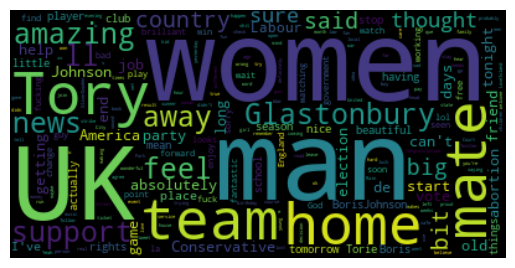

In [16]:
plot_wordcloud(uk_df , en_lang_stopwords_list)

# Abortion Rowe v Wade

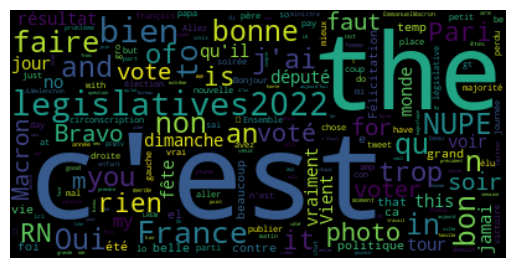

In [17]:
plot_wordcloud(fr_df , fr_lang_stopwords_list)

# Legislative Assembly

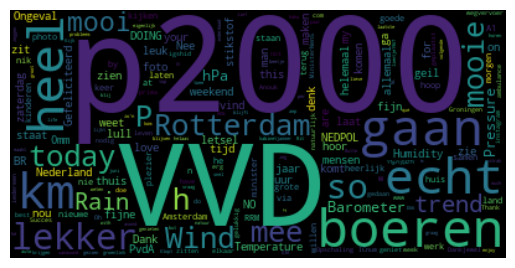

In [18]:
plot_wordcloud(nl_df , nl_lang_stopwords_list)

# VVD? P2000? farmer? -> emergency services?

#### Any other method - Hashtags!

In [3]:
%%time

# File-Reading
path = os.path.join(os.getcwd() , out_file_for_hashtag) # from utils

print(f'the path is -> {path}')

ts = []
tweets = []
country = []
hashtags = []

with open(path , 'r' , encoding='utf-8') as in_file:
    for line in in_file:
        line = line.rstrip()
        tweet = line.split('|') # get reqd data in a list format

        # add into individual lists
        ts.append(tweet[0])
        tweets.append(tweet[1])
        country.append(tweet[2])
        hashtags.append(tweet[3])
        
ts_convert = [datetime.datetime.fromtimestamp(int(dt)//1000) for dt in ts]

the path is -> c:\Users\soura\Documents\ECMM443\Twitter_Coursework\all_june_tweets_hastags.txt
CPU times: total: 23.8 s
Wall time: 24.6 s


In [5]:
%%time

twt_df = pd.DataFrame(list(zip(tweets , ts_convert , country , hashtags)) , columns = ['tweet_id' , 'ts' , 'country' , 'hashtags'])
twt_df = twt_df[twt_df['tweet_id']!="None"].drop_duplicates()
print(f'length of tweet -> {len(twt_df)}')

length of tweet -> 15033548
CPU times: total: 36.4 s
Wall time: 40.6 s


In [72]:
restricted_country_df = twt_df.merge(pivoted_country_names , left_on = 'country' , right_on = 'name' , how = 'inner')
restricted_country_df = restricted_country_df[['ts' , 'tweet_id' , 'en' , 'hashtags']]#.dropna()
restricted_country_df = restricted_country_df[restricted_country_df['hashtags']!="[]"]

# Create a date column
restricted_country_df['ts_day'] = pd.to_datetime(restricted_country_df['ts']).dt.date

def extract_hashtags(df):
    df['hashtags'] = df['hashtags'].apply(lambda x: ast.literal_eval(x))
    return df.explode('hashtags')['hashtags'].tolist() # take as series then convert to list

# restrict acc to dates and country
# United Kingdom
uk_df = restricted_country_df[
    (
        (restricted_country_df['en']=="United Kingdom")&(restricted_country_df['ts_day']==pd.to_datetime("2022-06-24").date())
    )
][['hashtags']]

uk_df = extract_hashtags(uk_df)

# France
fr_df = restricted_country_df[
    (
        (restricted_country_df['en']=="France")&(restricted_country_df['ts_day']==pd.to_datetime("2022-06-19").date())
    )
][['hashtags']]

fr_df = extract_hashtags(fr_df)

# Netherlands
nl_df = restricted_country_df[
    (
        (restricted_country_df['en']=="Netherlands")&(restricted_country_df['ts_day']==pd.to_datetime("2022-06-11").date())
    )
][['hashtags']]

nl_df = extract_hashtags(nl_df)


# restrict acc to other dates (every date EXCEPT the date of interest) and country
# United Kingdom
uk_df_other_days = restricted_country_df[
    (
        (restricted_country_df['en']=="United Kingdom")&(restricted_country_df['ts_day']!=pd.to_datetime("2022-06-24").date())
    )
][['hashtags']]

uk_df_other_days = extract_hashtags(uk_df_other_days)

# France
fr_df_other_days = restricted_country_df[
    (
        (restricted_country_df['en']=="France")&(restricted_country_df['ts_day']!=pd.to_datetime("2022-06-19").date())
    )
][['hashtags']]

fr_df_other_days = extract_hashtags(fr_df_other_days)

# Netherlands
nl_df_other_days = restricted_country_df[
    (
        (restricted_country_df['en']=="Netherlands")&(restricted_country_df['ts_day']!=pd.to_datetime("2022-06-11").date())
    )
][['hashtags']]

nl_df_other_days = extract_hashtags(nl_df_other_days)

In [62]:
def make_hashtag_df(hashtag_list):
    '''
    makes a df of the hashtag occurences. easier to handle for me
    params: hashtag_list_counted -> list containing all occurences of hashtags
    returns: df -> dataframe containing hashtags and occurences
    '''
    hashtag_list_counted = Counter(hashtag_list)
    L = []
    for el in hashtag_list_counted:
        L.append([el , hashtag_list_counted[el]])
    df = pd.DataFrame(L , columns = ['hashtag','occurence']).sort_values('occurence' , ascending = False)
    df['%occurence'] = df['occurence']/df['occurence'].sum()
    return df

In [65]:
make_hashtag_df(nl_df).head()

,hashtag,occurence,%occurence
3,p2000,403,0.073259
1092,NEDPOL,168,0.030540
23,RRM,94,0.017088
22,ROTTERDAM,91,0.016542
2,ambulance,75,0.013634


In [66]:
make_hashtag_df(nl_df_other_days).head()

,hashtag,occurence,%occurence
7,p2000,11277,0.081272
108,brugopen,2573,0.018543
12,ambulance,2317,0.016698
49,RRM,1976,0.014241
288,HGL,1011,0.007286


In [68]:
make_hashtag_df(uk_df).head()

,hashtag,occurence,%occurence
30,LoveIsland,444,0.010149
115,Glastonbury2022,412,0.009418
12588,RoeVsWade,373,0.008526
114,Glastonbury,368,0.008412
4322,glastonburyfestival2022,303,0.006926


In [69]:
make_hashtag_df(uk_df_other_days).head()

,hashtag,occurence,%occurence
22111,LoveIsland,11947,0.010403
14,PlatinumJubilee,6478,0.005641
1471,loveisland,3187,0.002775
709,Glastonbury2022,3048,0.002654
4702,Retail,2698,0.002349


In [73]:
make_hashtag_df(fr_df).head()

,hashtag,occurence,%occurence
28,legislatives2022,1345,0.088984
468,NUPES,178,0.011776
1222,chat,146,0.009659
401,nupes,140,0.009262
1132,perdu,136,0.008998


In [74]:
make_hashtag_df(fr_df_other_days).head()

,hashtag,occurence,%occurence
3,legislatives2022,8030,0.018948
1610,chat,4085,0.009639
671,NUPES,3738,0.008820
1452,perdu,3691,0.008709
11,nupes,1918,0.004526
